## installing

In [ ]:
!pip install tse-option

## importing

In [1]:
import tse_option as tso

## using (1)
با استفاده از تابع زیر، تمامی اختیار معامله های موجود روی سهم مورد نظر شما در خروجی نمایش داده می شود.
#### زنجیره قراردادها

In [118]:
df = tso.option_chain(symbol="خودرو", trading_days=100, IV=True, leverage=True, P_BSM=True, sort="Maturity")
df[df['Status']=='ATM'] #sorted by time to maturity
#df.head()

Stock Price: 3461 	RiskFreeRate: 32.75% 	HV: 31.8%


Strike Price Status Maturity(day)  Size Open Interest  Bid   Ask  \
Symbol                                                                       
ضخود11381         3500    ATM             1  1000             0    0     1   
ضخود12361         3500    ATM            28  1000             0  230   232   
ضخود01381         3500    ATM            63  1000             0  351   855   
ضخود2057          3500    ATM            91  1000             0  366  1555   
ضخود3094          3500    ATM           126  1000             0    2     0   

           Initial Margin  Delta      IV Leverage  BSM %Price/BSM  Stock  
Symbol                                                                    
ضخود11381          700000   0.50   %14.2   1730.5   10     %90.0🟢  خودرو  
ضخود12361          930000   0.49   %54.1     7.31  148    %-56.8🔴  خودرو  
ضخود01381         1051000   0.46  %139.1     1.86  268   %-219.0🔴  خودرو  
ضخود2057          1066000   0.42  %225.3     0.93  353   %-340.5🔴  خودرو  
ضخود3094           702000   0.36      %-      inf  453         %-  خودرو

علاوه بر موارد فوق می توان مرتب سازی را براساس تعداد موقعیت های باز هر اختیار معامله انجام داد

همچنین می توان با تغییراتی در آرگومان های ورودی، نمایش برخی از ستون ها را غیرفعال کرد. این قابلیت برای ستون هایی همچون "تلاطم ضمنی"، "اهرم" و "نسبت قیمت بازار به قیمت بلک-شولز" وجود دارد.

In [5]:
#Strike Price = قیمت اعمال

#Status = وضعیت در سود یا ضرر بودن اختیار معامله

#Maturity(day) = زمان تا سررسید

#Open Interest = تعداد موقعیت های باز

#Bid = بهترین قیمت پیشنهادی برای خرید

#Ask = بهترین قیمتم پیشنهادی برای فروش

#Delta = دلتای اختیار معامله

#IV = تلاطم ضمنی

#Leverage = اهرم اختیار معامله

#BSM = قیمت تئوری اختیار معامله براساس مدل بلک-شولز-مرتون

#%Price/BSM = نسبت قیمت بازار به قیمت بلک-شولز -مرتون

## using (2)

با استفاده از تابع زیر، اطلاعات یک اختیار معامله خاص به شما نمایش داده می شود.

#### اختیار خرید

In [117]:
df = tso.call(option_symbol="ضذوب1202", trading_days=100, IV=True, leverage=False, P_BSM=True)
df

Stock Price: 503	RiskFreeRate: 32.75%	HV: 32.22%


Strike Price Status Maturity(day)  Size Open Interest  Bid  Ask  \
Symbol                                                                     
ضذوب1202          400    ITM            49  1000             0  131  136   

         Last Price  Initial Margin  Delta  IV  BSM %Price/BSM Stock  
Symbol                                                                
ضذوب1202        132          331000   0.33  %-  121    %-12.4🔴   ذوب

ستون "نسبت قیمت بازار به قیمت بلک-شولز" بیانگر میزان overvalue یا undervalue بودن اختیار را نشان می دهد.

**توجه**: کلیه خروجی این ماژول از جمله قیمت گذاری و محاسبه تلاطم ضمنی و ... به جهت تسهیل در تصمیم گیری سرمایه گذاران است و هیچگونه پیشنهادی برای خرید یا فروش آن محسوب نمی شود.

#### اختیار فروش

In [116]:
df = tso.put('طخود1138', trading_days=100, leverage=True, P_BSM=True)
df

Stock Price: 3461	RiskFreeRate: 32.75%	HV: 31.8%


Strike Price Status Maturity(day)  Size Open Interest Last Price  \
Symbol                                                                       
طخود11381         3500    ATM             1  1000             0        150   

           Initial Margin  Delta Leverage  BSM %Price/BSM  Stock  
Symbol                                                            
طخود11381          850000   -0.5    11.54   45   %-233.3🔴  خودرو

## using (3)

با استفاده از تابع زیر می توان تاریخچه نمادهای بازار بورس و فرابورس را دریافت کرد. لازم به یادآوری است که این تابع دارای قابلیت ارائه قیمت های تعدیل شده سهام را نیز هست.

در صورتی که تمایل دارید، دیتافریم تاریخچه قیمت از را در بازه خاصی از تاریخ مشاهده کنید میتوانید همانند مثال های زیر عمل کنید.


**نکته**: اگر تمایل دارید که از تاریخ جلالی جهت اسلایسینگ استفاده کنید لازم است که مقدار j_date را برابر True قرار دهید

In [10]:
df = tso.download(symbols='خودرو', j_date=True, start="1401-01-01")
df

Open    High     Low   Close      Volume                JDate
Date                                                                       
2022-03-26  2517.0  2517.0  2400.0  2474.0  1216916657  1401-01-06 00:00:00
2022-03-27  2419.0  2580.0  2390.0  2506.0  1189151897  1401-01-07 00:00:00
2022-03-28  2450.0  2619.0  2441.0  2554.0  1172187240  1401-01-08 00:00:00
2022-03-29  2590.0  2600.0  2427.0  2459.0  1158765837  1401-01-09 00:00:00
2022-03-30  2400.0  2548.0  2375.0  2471.0   962901083  1401-01-10 00:00:00
...            ...     ...     ...     ...         ...                  ...
2024-09-18  2561.0  2628.0  2530.0  2582.0   111435593  1403-06-28 00:00:00
2024-09-22  2530.0  2587.0  2520.0  2549.0    83965593  1403-07-01 00:00:00
2024-09-23  2550.0  2625.0  2521.0  2610.0   162696809  1403-07-02 00:00:00
2024-09-24  2625.0  2688.0  2620.0  2672.0   137885503  1403-07-03 00:00:00
2024-09-25  2672.0  2678.0  2601.0  2633.0   153187832  1403-07-04 00:00:00

[560 rows x 6 columns]

In [11]:
df = tso.download(symbols='خودرو', j_date=True, start="1401-01-01", adjust_price=True)
df

Open    High     Low   Close      Volume  Adj Open  Adj High  \
Date                                                                         
2022-03-26  2517.0  2517.0  2400.0  2474.0  1216916657      2532      2532   
2022-03-27  2419.0  2580.0  2390.0  2506.0  1189151897      2434      2596   
2022-03-28  2450.0  2619.0  2441.0  2554.0  1172187240      2465      2635   
2022-03-29  2590.0  2600.0  2427.0  2459.0  1158765837      2606      2616   
2022-03-30  2400.0  2548.0  2375.0  2471.0   962901083      2414      2563   
...            ...     ...     ...     ...         ...       ...       ...   
2024-09-18  2561.0  2628.0  2530.0  2582.0   111435593      2561      2628   
2024-09-22  2530.0  2587.0  2520.0  2549.0    83965593      2530      2587   
2024-09-23  2550.0  2625.0  2521.0  2610.0   162696809      2550      2625   
2024-09-24  2625.0  2688.0  2620.0  2672.0   137885503      2625      2688   
2024-09-25  2672.0  2678.0  2601.0  2633.0   153187832      2672      2678   

            Adj Low  Adj Close                JDate  
Date                                                 
2022-03-26     2414       2489  1401-01-06 00:00:00  
2022-03-27     2404       2521  1401-01-07 00:00:00  
2022-03-28     2456       2569  1401-01-08 00:00:00  
2022-03-29     2442       2474  1401-01-09 00:00:00  
2022-03-30     2389       2486  1401-01-10 00:00:00  
...             ...        ...                  ...  
2024-09-18     2530       2582  1403-06-28 00:00:00  
2024-09-22     2520       2549  1403-07-01 00:00:00  
2024-09-23     2521       2610  1403-07-02 00:00:00  
2024-09-24     2620       2672  1403-07-03 00:00:00  
2024-09-25     2601       2633  1403-07-04 00:00:00  

[560 rows x 10 columns]

### رسم نمودار شمعی براساس خروچی تابع download_history()

In [ ]:
!pip install mplfinance

In [12]:
import mplfinance as mpf

##### رسم نمودار تعدیل نشده

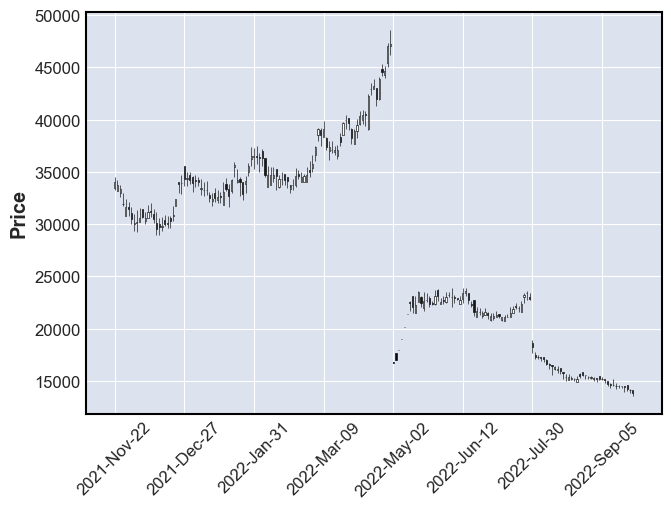

In [14]:
df = tso.download("شبریز", j_date=True, start="1400-09-01", end="1401-06-31")
mpf.plot(df, type='candle') #رسم نمودار تعدیل نشده

##### رسم نمودار تعدیل شده

برای رسم نمودار تعدیل شده با ماژول mplfinance می بایست علاوه بر فعال کردن خروجی تعدیل شده، مقدار drop_unadjusted را برابر True قرار داد

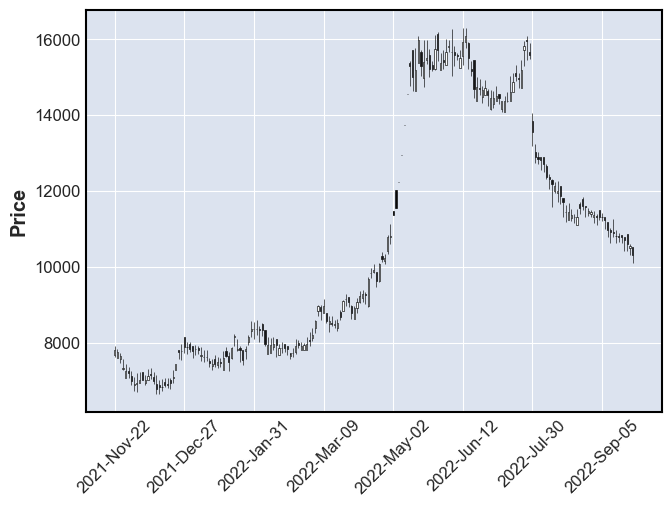

In [15]:
df = tso.download("شبریز", j_date=True, start="1400-09-01", end="1401-06-31", adjust_price=True, drop_unadjusted=True)
mpf.plot(df, type='candle') #رسم نمودار تعدیل شده

علاوه بر قابلیت دریافت تاریخچه سهام، شما می توانید تاریخچه قیمت اختیار معامله های مختلف را نیز دریافت کنید

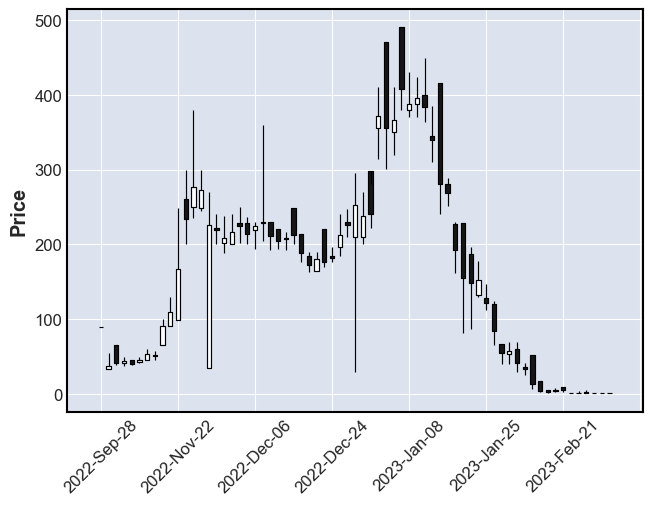

In [16]:
df = tso.download("ضسپا1208")
mpf.plot(df, type='candle')

### دریافت سابقه قیمت چند سهم به صورت همزمان

برای دریافت همزمان تاریخچه معاملات، می توانید نمادهای مورد نظر را در قالب list به تابع download_history() بدهید.

In [17]:
df = tso.download(symbols=["خودرو","خساپا"],j_date=True,start="1401-01-01",adjust_price=True)
df

Adj Close         Adj High         Adj Low         Adj Open  \
               خودرو   خساپا    خودرو   خساپا   خودرو   خساپا    خودرو   
Date                                                                     
2022-03-26    2489.0  1943.0   2532.0  1946.0  2414.0  1910.0   2532.0   
2022-03-27    2521.0  2017.0   2596.0  2039.0  2404.0  1919.0   2434.0   
2022-03-28    2569.0  2114.0   2635.0  2117.0  2456.0  2040.0   2465.0   
2022-03-29    2474.0  2083.0   2616.0  2173.0  2442.0  2023.0   2606.0   
2022-03-30    2486.0  2135.0   2563.0  2186.0  2389.0  2038.0   2414.0   
...              ...     ...      ...     ...     ...     ...      ...   
2024-09-18    2582.0  2433.0   2628.0  2470.0  2530.0  2384.0   2561.0   
2024-09-22    2549.0  2405.0   2587.0  2444.0  2520.0  2380.0   2530.0   
2024-09-23    2610.0  2443.0   2625.0  2470.0  2521.0  2371.0   2550.0   
2024-09-24    2672.0  2494.0   2688.0  2516.0  2620.0  2448.0   2625.0   
2024-09-25    2633.0  2456.0   2678.0  2500.0  2601.0  2432.0   2672.0   

                     Close            High             Low            Open  \
             خساپا   خودرو   خساپا   خودرو   خساپا   خودرو   خساپا   خودرو   
Date                                                                         
2022-03-26  1946.0  2474.0  1913.0  2517.0  1916.0  2400.0  1881.0  2517.0   
2022-03-27  1920.0  2506.0  1986.0  2580.0  2008.0  2390.0  1890.0  2419.0   
2022-03-28  2040.0  2554.0  2082.0  2619.0  2085.0  2441.0  2009.0  2450.0   
2022-03-29  2155.0  2459.0  2051.0  2600.0  2140.0  2427.0  1992.0  2590.0   
2022-03-30  2051.0  2471.0  2102.0  2548.0  2153.0  2375.0  2007.0  2400.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2024-09-18  2426.0  2582.0  2433.0  2628.0  2470.0  2530.0  2384.0  2561.0   
2024-09-22  2386.0  2549.0  2405.0  2587.0  2444.0  2520.0  2380.0  2530.0   
2024-09-23  2371.0  2610.0  2443.0  2625.0  2470.0  2521.0  2371.0  2550.0   
2024-09-24  2449.0  2672.0  2494.0  2688.0  2516.0  2620.0  2448.0  2625.0   
2024-09-25  2489.0  2633.0  2456.0  2678.0  2500.0  2601.0  2432.0  2672.0   

                          Volume                              JDate  
             خساپا         خودرو         خساپا                       
Date                                                                 
2022-03-26  1916.0  1.216917e+09  1.829062e+09  1401-01-06 00:00:00  
2022-03-27  1891.0  1.189152e+09  1.346524e+09  1401-01-07 00:00:00  
2022-03-28  2009.0  1.172187e+09  1.254772e+09  1401-01-08 00:00:00  
2022-03-29  2122.0  1.158766e+09  1.296728e+09  1401-01-09 00:00:00  
2022-03-30  2020.0  9.629011e+08  9.776830e+08  1401-01-10 00:00:00  
...            ...           ...           ...                  ...  
2024-09-18  2426.0  1.114356e+08  7.120431e+07  1403-06-28 00:00:00  
2024-09-22  2386.0  8.396559e+07  1.446411e+08  1403-07-01 00:00:00  
2024-09-23  2371.0  1.626968e+08  1.440545e+08  1403-07-02 00:00:00  
2024-09-24  2449.0  1.378855e+08  1.209564e+08  1403-07-03 00:00:00  
2024-09-25  2489.0  1.531878e+08  1.197247e+08  1403-07-04 00:00:00  

[579 rows x 19 columns]

<AxesSubplot:xlabel='Date'>

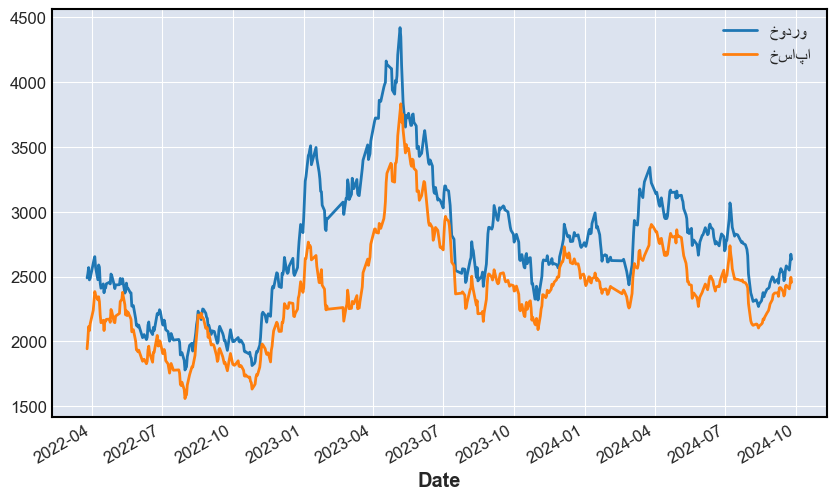

In [18]:
import matplotlib.pyplot as plt
df["Adj Close"].dropna().plot(figsize=(10,6))